## Choosing best SVM kernel

Choosing the best SVM kernel for a dataset depends on various factors such as the nature of the data, the complexity of the decision boundary, and the computational resources available. Here are some guidelines to help you choose the appropriate kernel:

1. **Linear Kernel (default)**:
   - Use when the data is linearly separable or when there are a large number of features compared to the number of samples.
   - Linear kernels are computationally efficient and can handle large datasets well.

2. **Polynomial Kernel**:
   - Use when the decision boundary is non-linear but can still be approximated by a polynomial function.
   - Adjust the degree parameter to control the complexity of the decision boundary. Higher degrees may lead to overfitting.

3. **RBF (Gaussian) Kernel**:
   - Use when the decision boundary is highly non-linear or when there is no prior knowledge about the data.
   - RBF kernels are more flexible and can capture complex relationships between data points.
   - Adjust the gamma parameter to control the smoothness of the decision boundary. Higher values of gamma lead to more complex decision boundaries and may result in overfitting.

4. **Sigmoid Kernel**:
   - Use when the data is not linearly separable and exhibits similarities with sigmoid functions.
   - Sigmoid kernels are less commonly used compared to linear, polynomial, and RBF kernels.

To choose the best kernel, you can try multiple kernels and evaluate their performance using techniques such as cross-validation and grid search:

- **Cross-validation**: Split the data into training and validation sets, train the SVM models with different kernels on the training set, and evaluate their performance on the validation set. Choose the kernel with the highest accuracy or other suitable evaluation metric.

- **Grid Search**: Perform a grid search over a predefined range of hyperparameters (e.g., degree for polynomial kernel, gamma for RBF kernel) using cross-validation to find the optimal combination of hyperparameters and kernel.

- **Domain Knowledge**: Consider the characteristics of your dataset and any prior knowledge about the problem domain. For example, if you know that the decision boundary is likely to be non-linear, you may start with a polynomial or RBF kernel.

It's essential to balance model performance with computational efficiency, especially for large datasets, as some kernels may require more computational resources than others. Experiment with different kernels and hyperparameters to find the one that achieves the best balance of performance and efficiency for your specific dataset and problem.

# Example: Implementation and hyperparameter tuning of Support Vector Machine in Python
For implementation on a dataset, we will be using the Income Evaluation dataset, which has information about an individual’s personal life and an output of 50K or <=50. The dataset can be found here (https://www.kaggle.com/datasets/lodetomasi1995/income-classification).

The task here is to classify the income of an individual when given the required inputs about his personal life.

First, let’s import all required libraries.

In [142]:
# Import all relevant libraries

from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore")

# Now let’s read the dataset and look at the columns to understand the information better.

df = pd.read_csv('income_evaluation.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [143]:
df.shape

(32561, 15)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [145]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [153]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [147]:
np.unique(df[' marital-status'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

Let's first remove the unecessary columns and that 1 space which is there

In [148]:
df.drop(columns=' fnlwgt',inplace=True)

In [155]:
np.unique(df[''])

KeyError: 'education-num'

#### Rename the column names
We can see that the dataset does not have proper column names. The column names should contain underscore instead of "hyphen-minus". We should give proper names to the columns. I will do it as follows:-

In [149]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [74]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Data Preprocessing
- Adding new columns in our dataset

In [75]:
# adding new categorical column
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)
df['income_num'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')

- bins = `[16, 24)`, `[24, 64)`, and `[64, 90)` bins and assigned labels "young","adult","old" respectively.
- `pd.cut()`: This function is used to segment and sort data values into bins. In your case, it segments the '`age`' column values into the specified bins based on the intervals provided in the bins 
- Last line of code set `1` for the values `>50K` income and `0` for `<50K` income.

\begin{equation}
\text{Income\_num} =
\begin{cases}
1, & >50K \\
0, & <=50K
\end{cases}
\end{equation}

In [76]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


- Stripping all the spaces of the columns using str.strip() function

In [151]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [78]:
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']

In [79]:
# Now removing leading and trailing whitespaces from the
# values in each column of the DataFrame 'df'
for i in strip_columns:
    df[i] = df[i].str.strip()

In [80]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [81]:
df.dtypes

age                  int64
workclass           object
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
age_types         category
income_num           int16
dtype: object

### Finding Categorical Values and Numerical Values

In [141]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')

print('Here are following categorical variables in the dataframe :\n\n', categorical)

There are 0 categorical variables

Here are following categorical variables in the dataframe :

 []


In [83]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [84]:
for var in categorical: 
    
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

- Now, we can see that there are several columns like workclass, occupation and native_country which contain missing values. Let's recheck it with the 'loc' operator.

In [85]:
df.loc[df['workclass']=='?']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


There are a good amount of rows where workclass, native country and occupation column have no value maybe it was because these people were not comfortable sharing this information . We can either remove these rows or make their value equals to NaN (Not a Number). I will go for the second option because we may miss out important datapoints by deleting the rows.

In [86]:
df.loc[df['workclass']=='?', 'workclass']= np.NaN
#another approach
#df['workclass'].replace(' ?', np.NaN, inplace=True)

df.loc[df['occupation']=='?', 'occupation']= np.NaN
#another approach
#df['occupation'].replace(' ?', np.NaN, inplace=True)

df.loc[df['native_country']=='?', 'native_country']= np.NaN
#another approach
#df['native_country'].replace(' ?', np.NaN, inplace=True)

In [87]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [88]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

## Data visualization

In [89]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


- Income is our target variable, let's first start by visualizing it

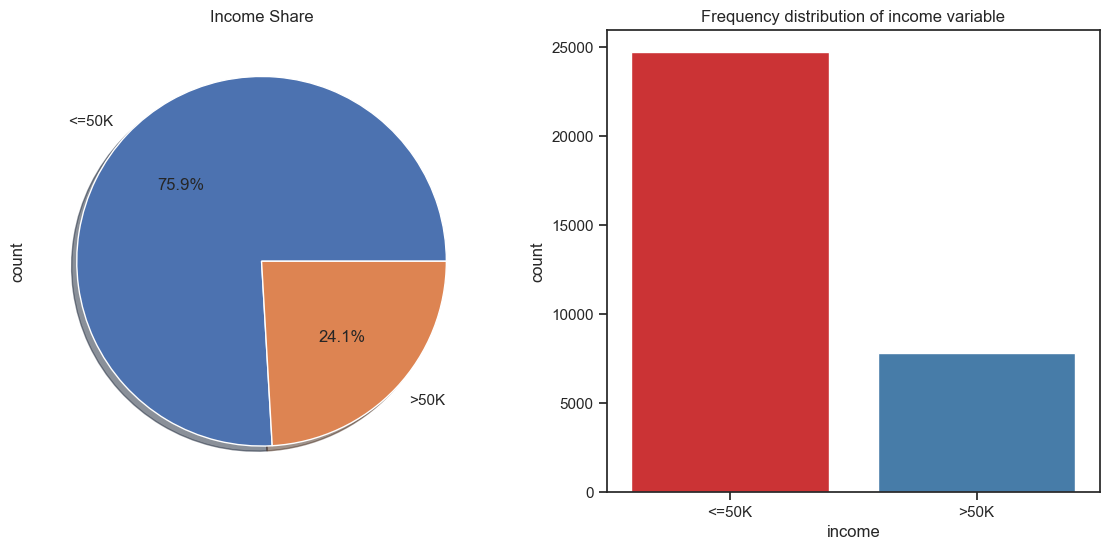

In [90]:
f, ax=plt.subplots(1,2,figsize=(14,6))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [91]:
df['income'].value_counts()/len(df)

income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64

In [92]:
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']

print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)


Since it is highy imbalanced the machine learning algorithm we use may get biased towards this kind of output (whichever having the higher number of outputs). We will try to balance this dataset later

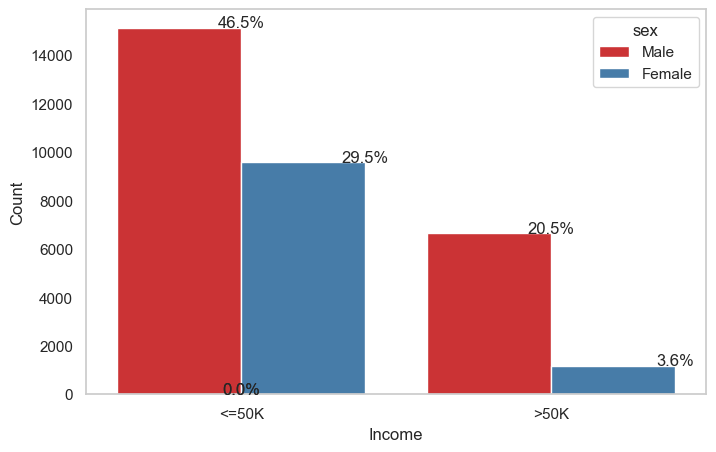

In [93]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="income", hue="sex", data=df, palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Male's seems to earn more than female in both the income categories

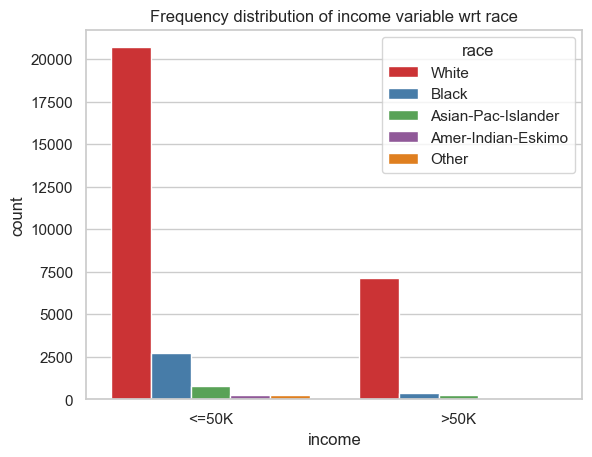

In [94]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

We can see that whites make more money than non-whites in both the income categories.

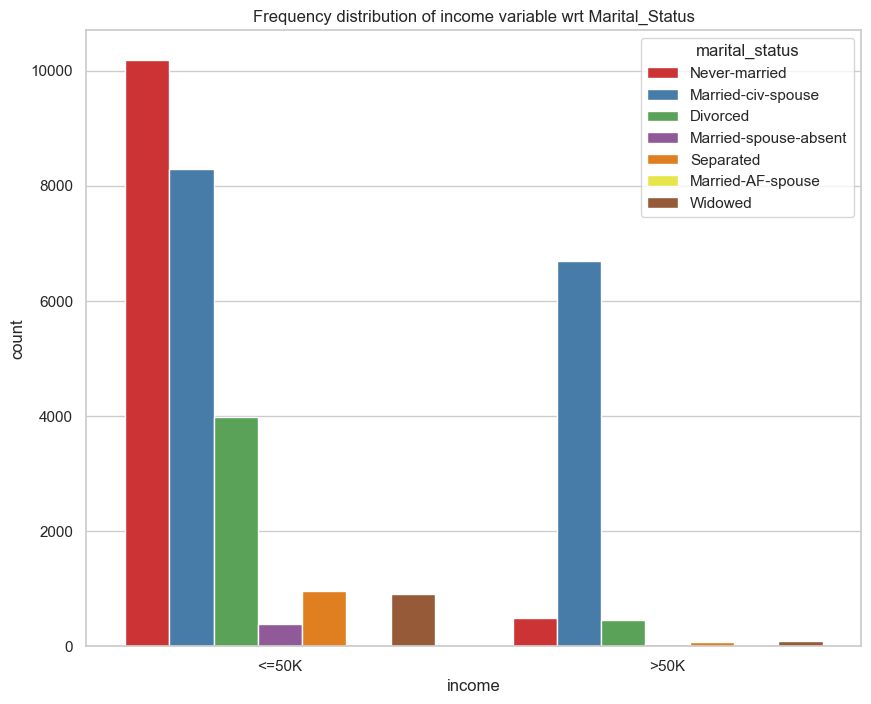

In [95]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="marital_status", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Marital_Status")
plt.show()

People who are not married earn less than 50k whereas people who are married earn more. 

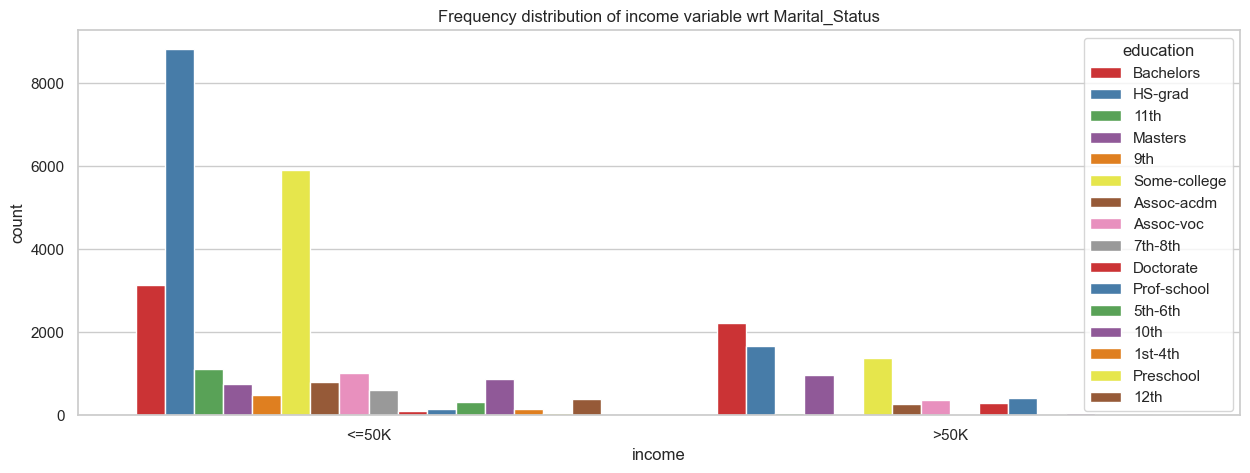

In [96]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="income", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Marital_Status")
plt.show()

We see people who have done masters are earning less than students who have just cleared their high school which is not normal. Let's try to observe more on these people

In [97]:
temp_2 = df.loc[(df['income']=='>50K') & (df['education'] == 'HS-grad')]
temp_2.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

<Axes: xlabel='marital_status', ylabel='count'>

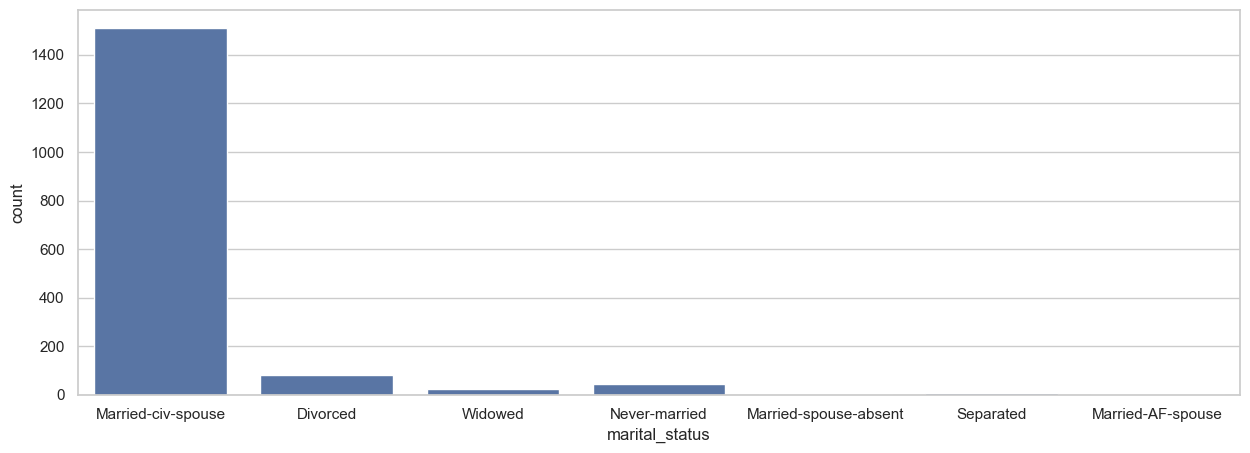

In [98]:

plt.figure(figsize=(15,5))
sns.countplot(x='marital_status',data=temp_2)

In [99]:
df.loc[(df['income']=='>50K') & (df['education'] == 'Masters')]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,adult,1
19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,adult,1
100,76,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,old,1
135,38,Federal-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Iran,>50K,adult,1
164,45,Self-emp-not-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,33,Private,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K,adult,1
32480,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,adult,1
32504,50,Private,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K,adult,1
32513,46,Private,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K,adult,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  object  
 2   education       32561 non-null  object  
 3   education_num   32561 non-null  int64   
 4   marital_status  32561 non-null  object  
 5   occupation      30718 non-null  object  
 6   relationship    32561 non-null  object  
 7   race            32561 non-null  object  
 8   sex             32561 non-null  object  
 9   capital_gain    32561 non-null  int64   
 10  capital_loss    32561 non-null  int64   
 11  hours_per_week  32561 non-null  int64   
 12  native_country  31978 non-null  object  
 13  income          32561 non-null  object  
 14  age_types       32561 non-null  category
 15  income_num      32561 non-null  int16   
dtypes: category(1), int16(1), int64(5), object(9)
memory usage

#### Numerical Columns

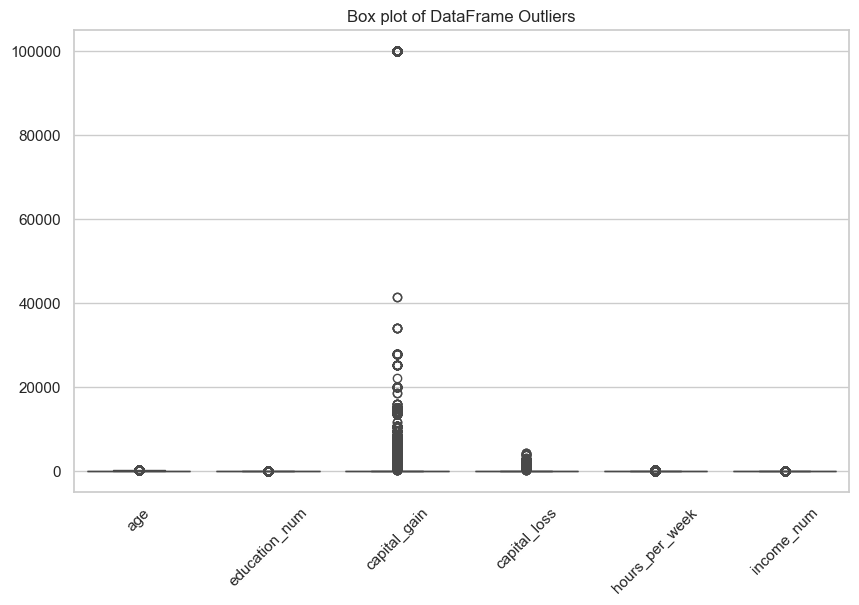

In [101]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plot of DataFrame Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [102]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

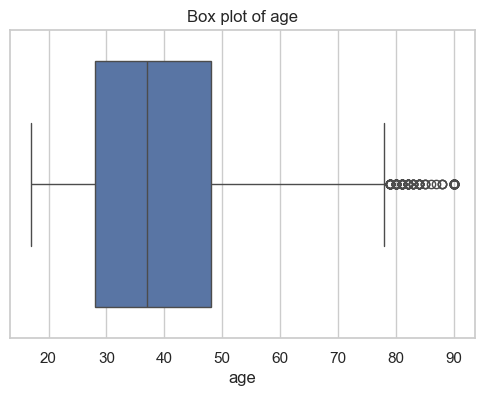

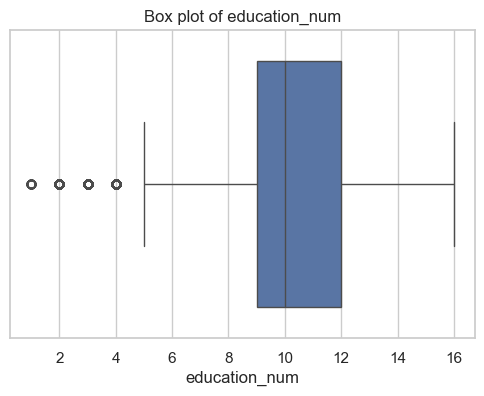

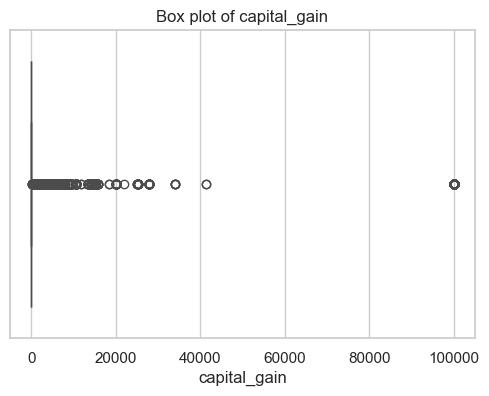

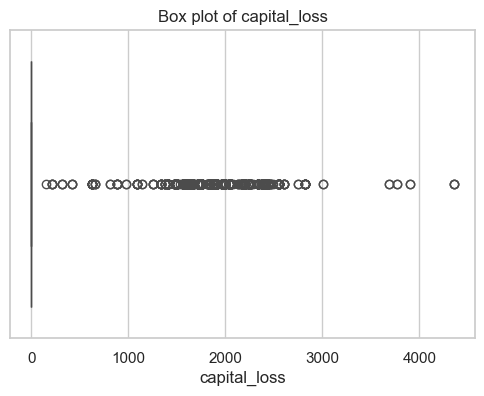

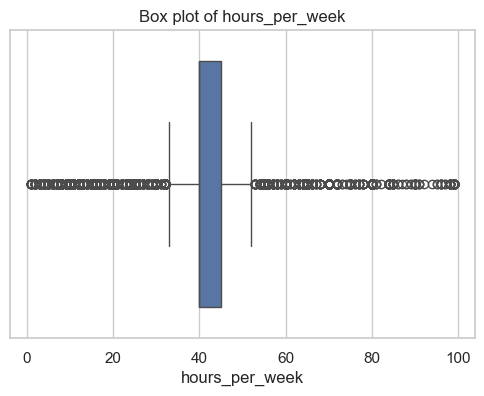

In [103]:
# Iterate through each numerical column
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Create a box plot for the current column
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

We see there are few outliers in capital gain and capital loss, let's look at these plots closely

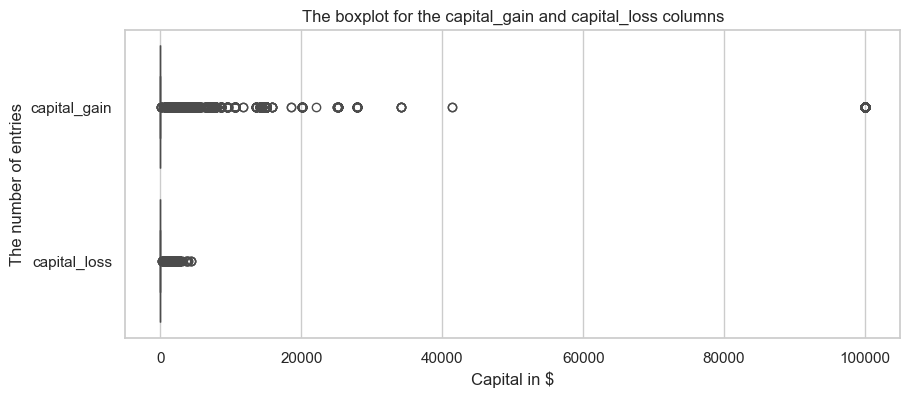

In [104]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=df[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

Dropping these outliers as it can lead to the result distortion

In [105]:
outlier_index = df.loc[df['capital_gain']>90000,'capital_gain'].index
df.drop(index=outlier_index,inplace=True)

In [106]:
outlier_index1 = df.loc[df['capital_loss']>4000,'capital_loss'].index
df.drop(index=outlier_index1,inplace=True)

<Figure size 1200x600 with 0 Axes>

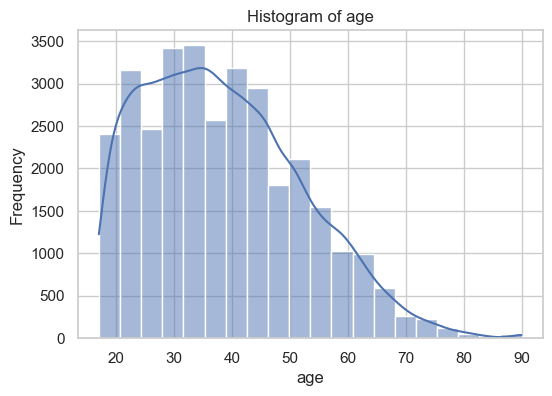

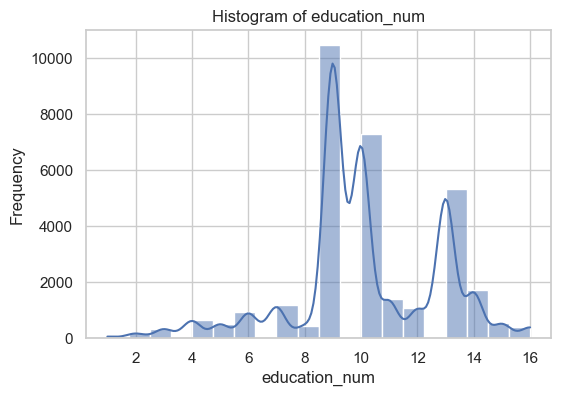

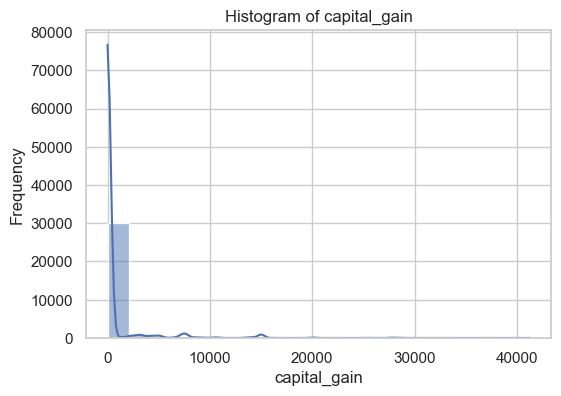

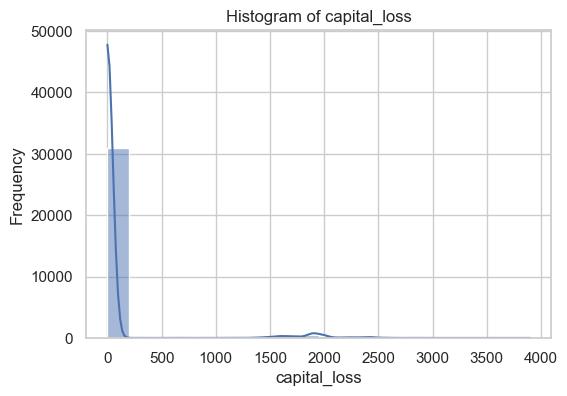

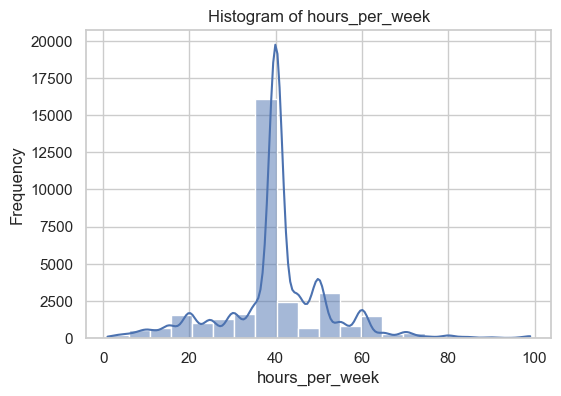

In [107]:
plt.figure(figsize=(12,6))
# Iterate through each numerical column
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Create a histogram for the current column
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- Most of the people are between 20-50 age range. The graph is rightly skewed so we need to normalize it by scaling
- The majority af hours per week no more than 50 h/w, and the most value is about 40 (8 hours per day).

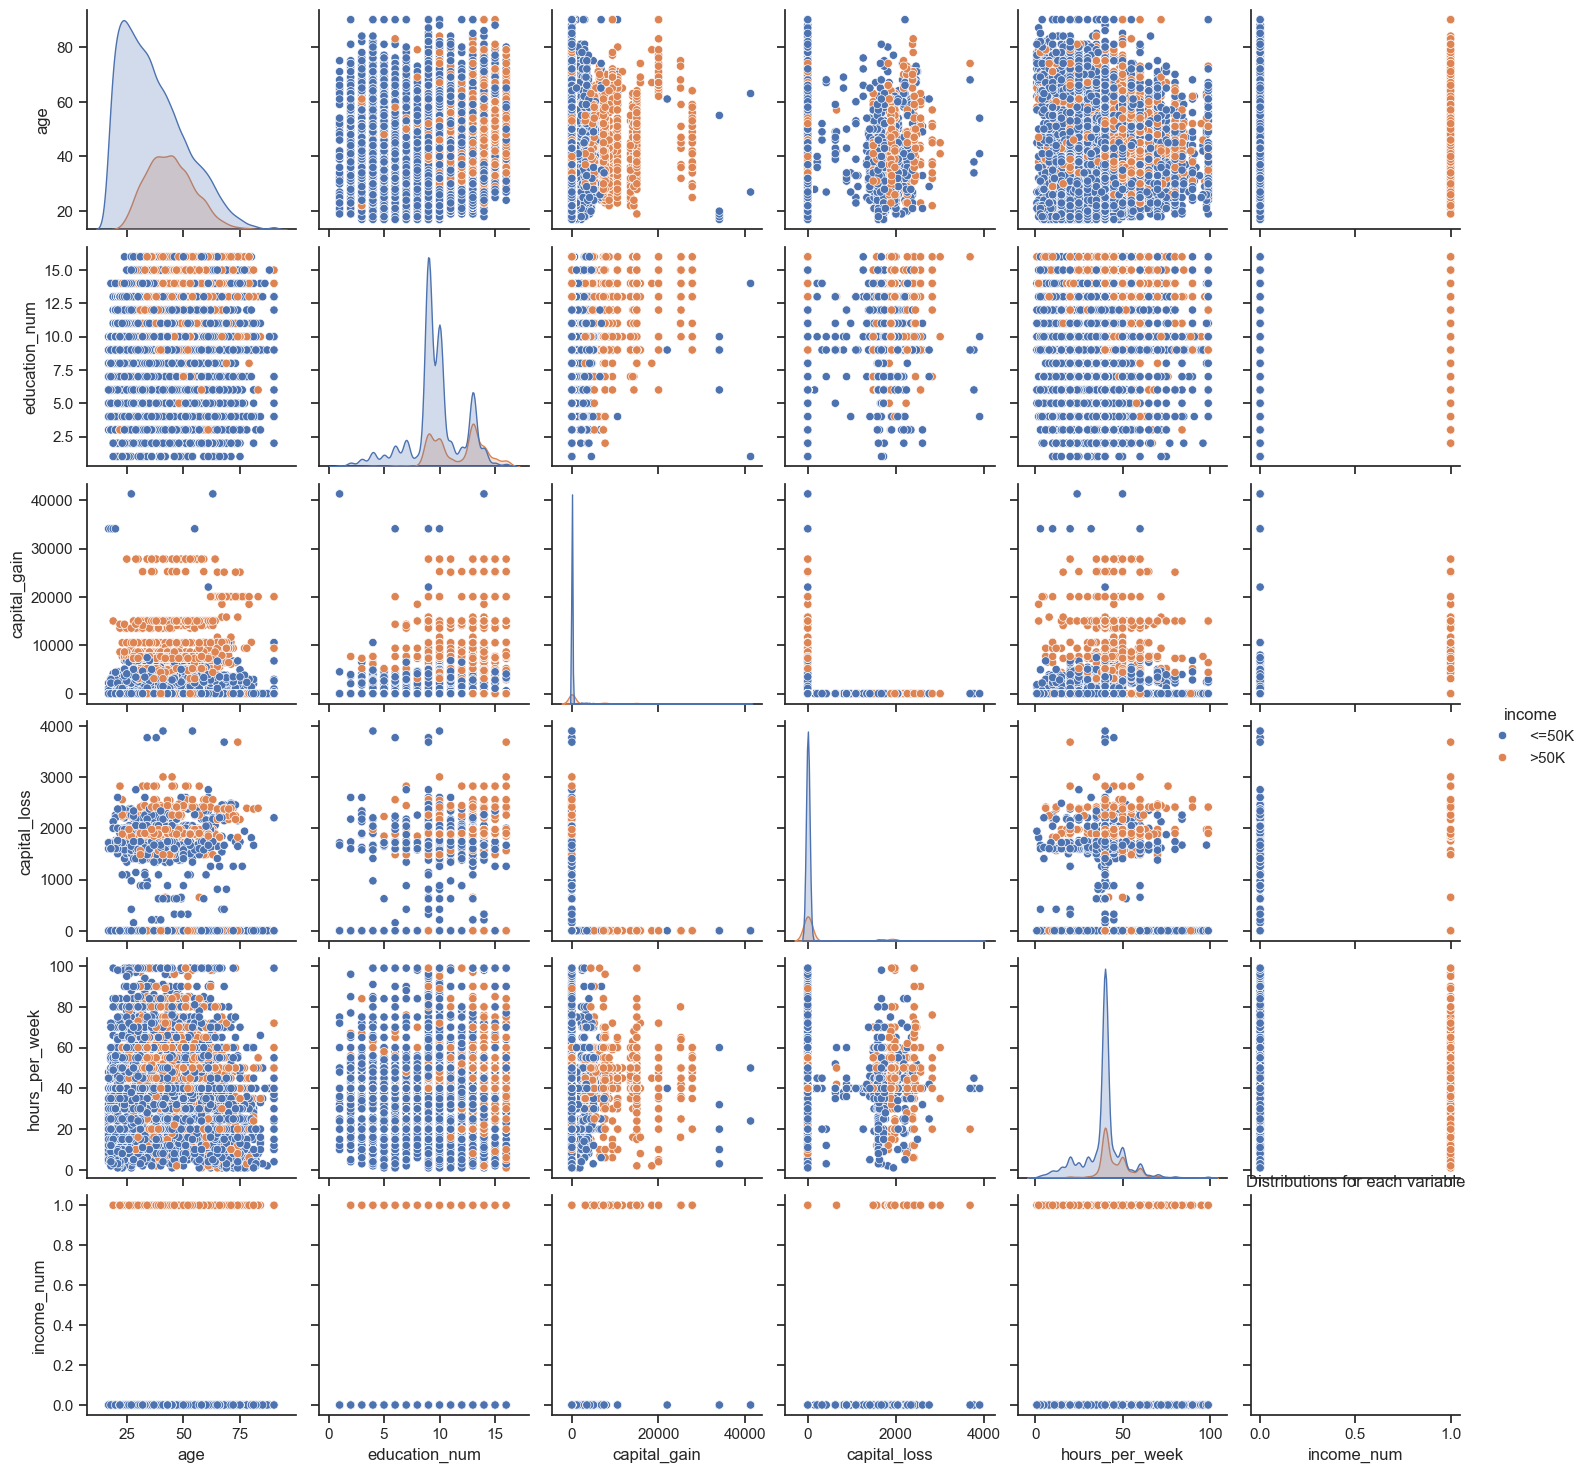

In [108]:
# Set the style of seaborn
sns.set(style="ticks")

sns.pairplot(data=df, hue="income")
plt.title('Distributions for each variable')
plt.show()

- **Categorical Columns**

In [109]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

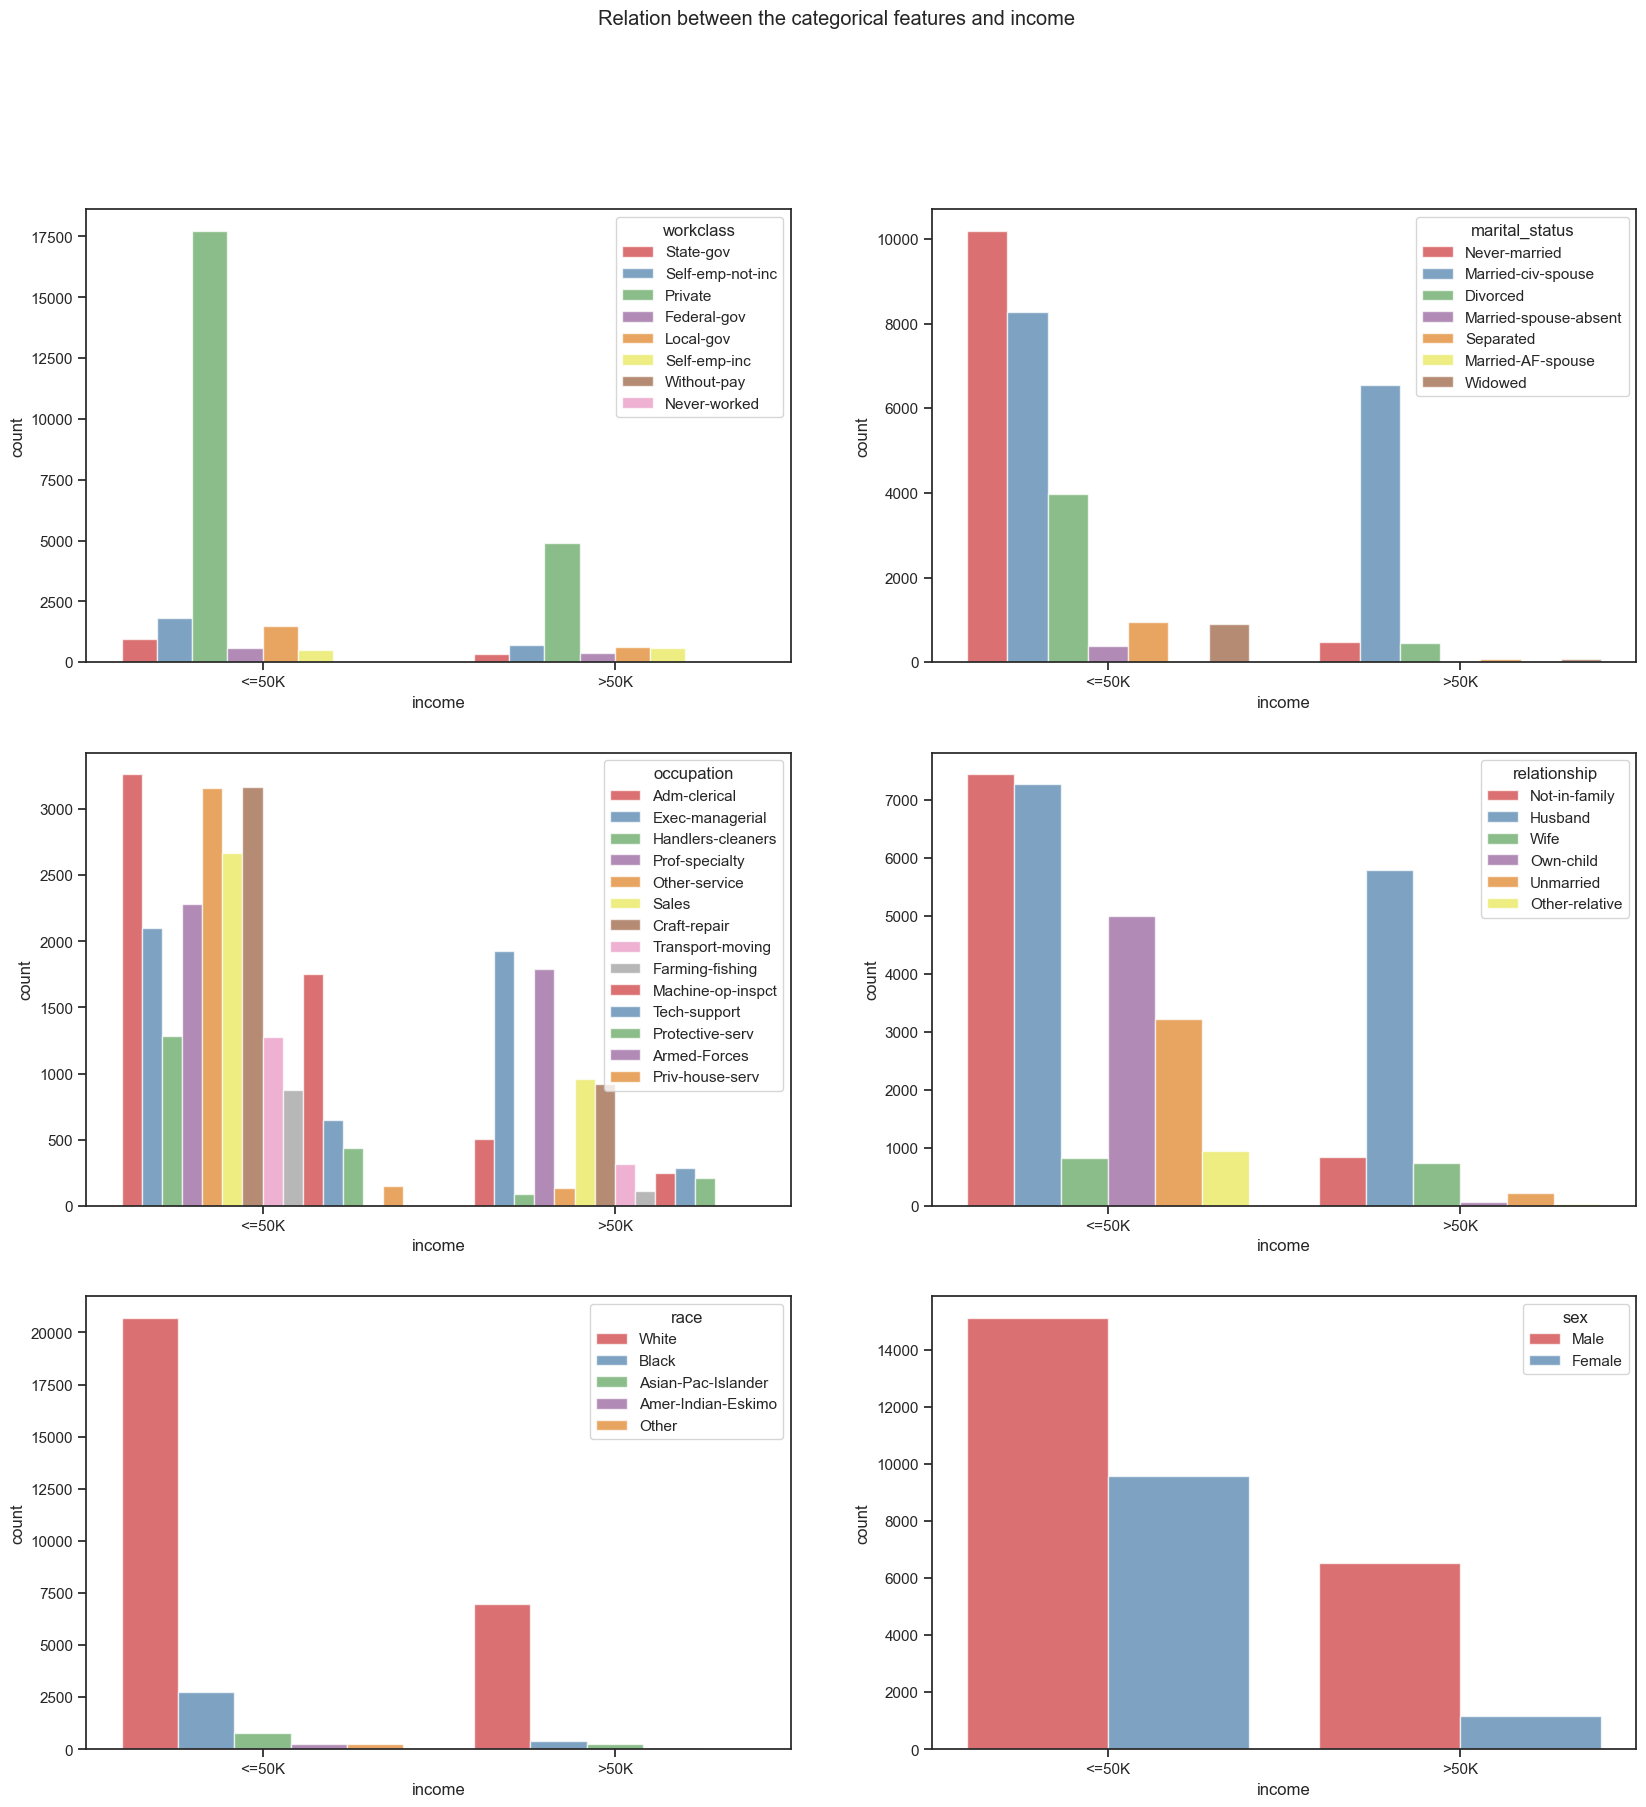

In [110]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')

In [111]:
# Drop non-numeric columns (if not needed for correlation analysis)
numeric_df = df.select_dtypes(include=['number'])

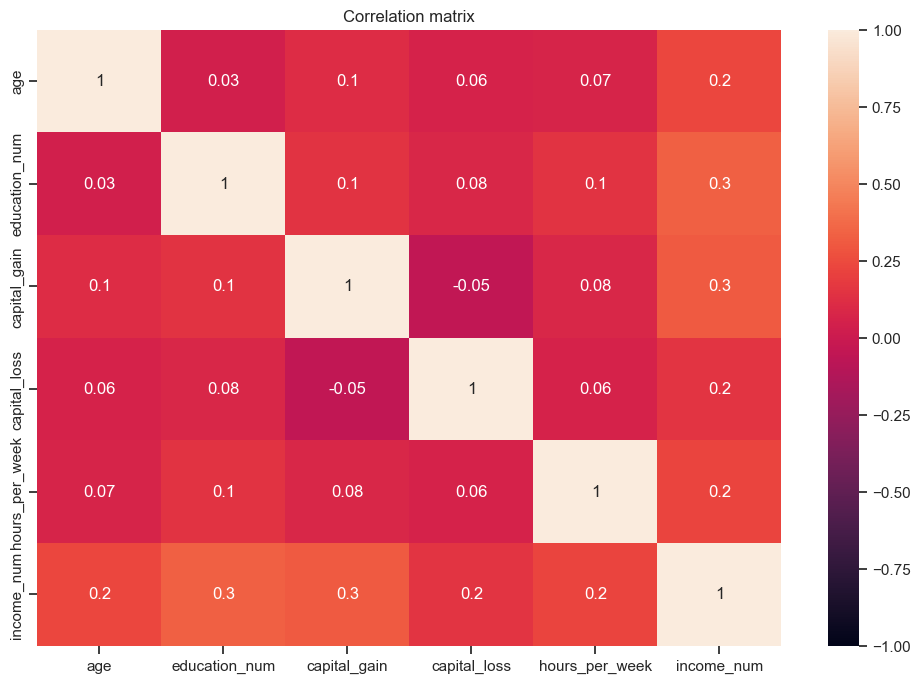

In [112]:
plt.figure(figsize=(12,8))
# Calculate the correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)
plt.title('Correlation matrix')
plt.show()

# SVM

- Feature and target variables

In [113]:
X = df.drop(columns='income')
y = df['income']

### Label encoding

- `LabelEncoder` class from the `sklearn.preprocessing` module to encode categorical variables into numeric values.

In [114]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [115]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [116]:
label_list = ['workclass', 'education','marital_status',
    'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)

In [117]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


### Normalizing the variables

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.drop(['income','age_types','income_num'],axis=1))
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))

In [119]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [140]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [120]:
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

In [121]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


### Handling imbalanced dataset

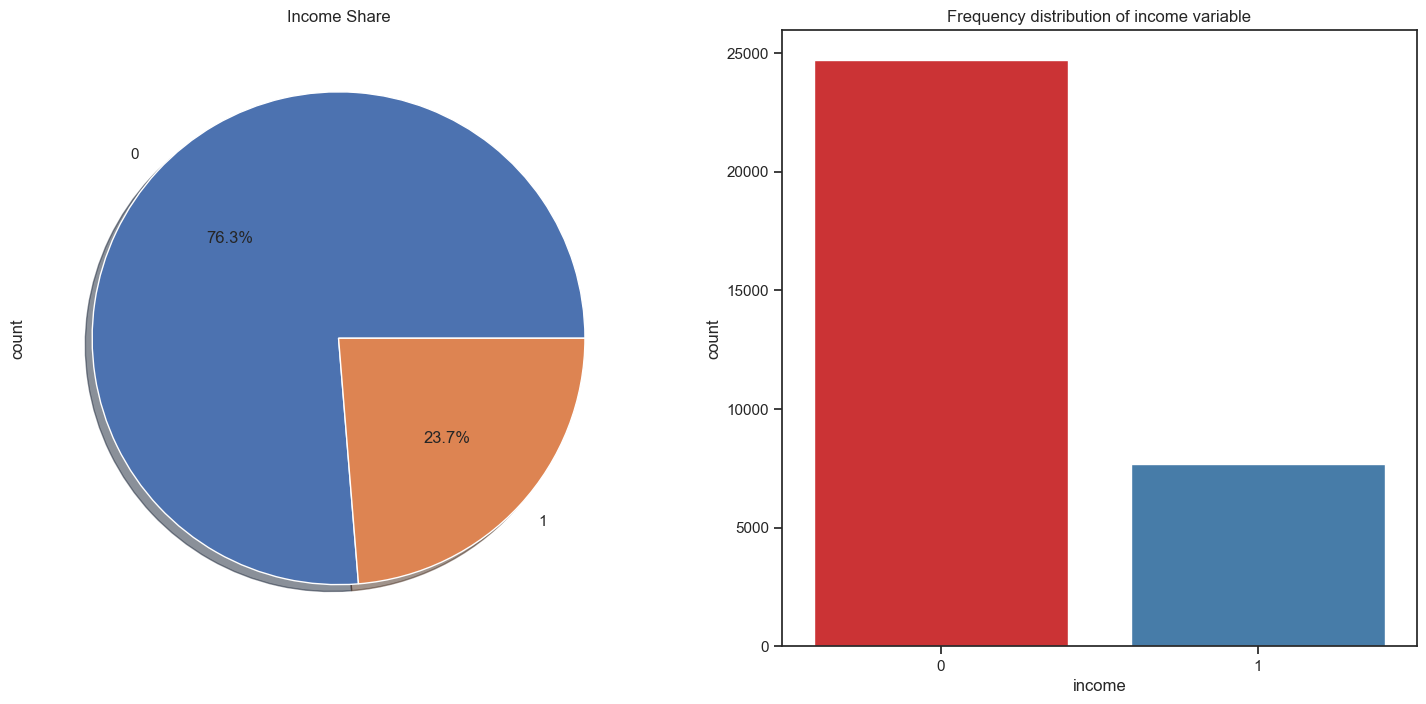

In [122]:
fig, ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

- Using over sampling method to handle imbalanced dataset

In [123]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = df_scaled
y= df.income


# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [124]:
X_res.shape,y_res.shape

((48178, 13), (48178,))

In [125]:
from collections import Counter
print(f'Original dataset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24089, 1: 24089})


### Train_test_split

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)

In [127]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38542, 13)
X_test shape: (9636, 13)
y_train shape: (38542,)
y_test shape: (9636,)


In [128]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Building Model
### 1. Gradient Boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

Train Score: 0.8668724503530505
Test Score: 0.8603154836031548


In [130]:
grid = {
    'learning_rate':[0.01,0.05,0.1], 
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8973586552590043
Test Score: 0.8959111664591116


In [131]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

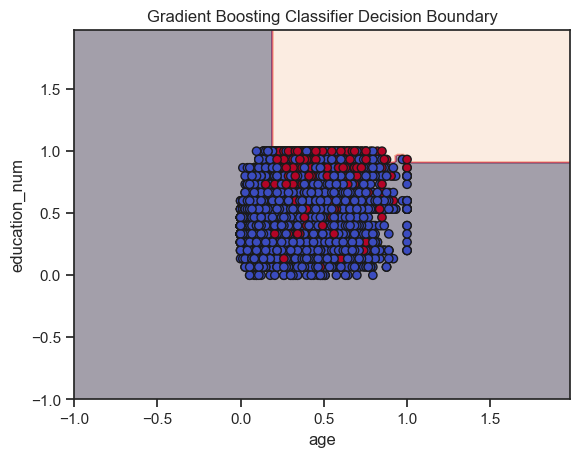

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Selecting features for the contour plot
feature1 = 'age'
feature2 = 'education_num'

# Extracting the selected features and target variable from the DataFrame
X = df[[feature1, feature2]]
y = df['income']

# Preprocessing: Label encoding for categorical variables
label_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in label_list:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing: Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

# Fitting the Gradient Boosting Classifier with default parameters
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train, y_train)

# Creating a meshgrid for the contour plot
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicting the class labels for the points in the meshgrid
Z = gradient_booster.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshaping the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plotting the contour plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Gradient Boosting Classifier Decision Boundary')
plt.show()


#### 2. SVC

By default, the SVC class uses the Radial Basis Function (RBF) kernel if no kernel is specified explicitly. The RBF kernel is commonly used in SVM because it is able to model complex decision boundaries by mapping the input space into a higher-dimensional space where the classes are separable by hyperplanes. This kernel is defined as:

$K(\mathbf{x_i}, \mathbf{x_j}) = \exp\left(-\gamma \|\mathbf{x_i} - \mathbf{x_j}\|^2\right)$

where:
- $\gamma $ is a hyperparameter that determines the width of the Gaussian function.
- $\mathbf{x_i}$ and $\mathbf{x_j}$ are the feature vectors of the training samples.

In [132]:
from sklearn.svm import SVC 
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.8343364628905767
Test Score: 0.8295973432959735


In [133]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

```grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_) 
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))```

grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_) 
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

In [136]:
from matplotlib.colors import ListedColormap

# Select two features for plotting (adjust these as needed)
feature1 = 'age'
feature2 = 'education_num'

# Define the meshgrid
h = 0.02
x_min, x_max = X_train[feature1].min() - 1, X_train[feature1].max() + 1
y_min, y_max = X_train[feature2].min() - 1, X_train[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the points in the meshgrid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_train[feature1], X_train[feature2], c=y_train, cmap=ListedColormap(('red', 'blue')), edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('SVM Decision Boundary')
plt.show()


ValueError: X has 2 features, but SVC is expecting 13 features as input.

- Visualizing the hyperparameter space can provide insights into the search space and help in understanding how different hyperparameters affect the model's performance. 

In [ ]:
# Define the hyperparameter grid
C_values = [0.01, 0.1, 1, 10]
kernel_values = ["linear", "poly", "rbf", "sigmoid"]
degree_values = [1, 3, 5, 7]
gamma_values = [0.01, 1]

# Create a grid of hyperparameter values
hyperparameters = [(C, kernel, degree, gamma) 
                   for C in C_values 
                   for kernel in kernel_values 
                   for degree in degree_values 
                   for gamma in gamma_values]

# Extract the scores from the grid search results
scores = [result.mean_validation_score for result in svm_cv.grid_scores_]

# Reshape the scores into a grid
score_grid = np.array(scores).reshape(len(C_values), len(kernel_values), len(degree_values), len(gamma_values))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(score_grid.mean(axis=(0, 3)), annot=True, xticklabels=gamma_values, yticklabels=C_values, 
            fmt='.4g', cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Mean Cross-Validation Score by C and Gamma')
plt.show()

#### 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

In [ ]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

#### 4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

In [ ]:
result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test,y_test)

In [ ]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=4000)

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X_train, y_train)

print("Best Parameters:",logreg_cv.best_params_)
print("Train Score:",logreg_cv.best_score_)
print("Test Score:",logreg_cv.score(X_test,y_test))

In [ ]:
result_dict_train["Logistic Regression GridSearch Train Score"] = logreg_cv.best_score_
result_dict_test["Logistic Regression GridSearch Test Score"] = logreg_cv.score(X_test,y_test)

# Reference

- https://dataaspirant.com/hyperparameter-tuning-with-keras-tuner/
- https://dataaspirant.com/svm-kernels/#t-1608054630725
- https://github.com/AnshulSaini17/Income_evaluation/blob/main/Income_Evalutation.ipynb